In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
from gwpopulation.models.mass import two_component_single
import glob
import corner as corner
import os
import matplotlib.lines as mlines
import variable_qmin
from variable_qmin import SmoothedParabolam2min
from bilby.core.prior import (
    Prior, PriorDict, ConditionalPriorDict,
    Uniform, ConditionalUniform, Constraint, 
)

In [19]:
events = np.array(['GW150914_095045', 'GW151012_095443', 'GW151226_033853', 'GW170104_101158', 'GW170608_020116', 'GW170729_185629', 'GW170809_082821', 'GW170814_103043', 'GW170818_022509', 'GW170823_131358', 'GW190408_181802', 'GW190412_053044', 'GW190413_134308', 'GW190421_213856', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190517_055101', 'GW190519_153544', 'GW190521_030229', 'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190803_022701', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190924_021846', 'GW190925_232845', 'GW190929_012149', 'GW190930_133541', 'GW191105_143521', 'GW191109_010717', 'GW191127_050227', 'GW191129_134029', 'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191222_033537', 'GW191230_180458', 'GW200112_155838', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', 'GW200208_130117', 'GW200209_085452', 'GW200219_094415', 'GW200224_222234', 'GW200225_060421', 'GW200302_015811', 'GW200311_115853', 'GW200316_215756', 'GW190413_052954', 'GW190719_215514', 'GW190725_174728', 'GW190731_140936', 'GW190805_211137', 'GW191103_012549', 'GW200216_220804'])

In [20]:
f=open('O1O2O3_PLPP_fewevents_no190814_spinredshift/logs/population-collection-bbh.err')
lines=f.readlines()
events_used =lines[107][60:-2]

In [21]:
np.sort(events)==events_used.split(', ')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [3]:
result_PL=h5py.File('inference/O1O2O3_powerlawm2min_prod_smoothing/result/bbh_mass_SmoothedPowerlawm2min_spin_iid_spin_redshift_powerlaw_result.hdf5')
result_PL_no190814=h5py.File('inference/O1O2O3_powerlawm2min_prod_smoothing_no190814/result/bbh_mass_SmoothedPowerlawm2min_spin_iid_spin_redshift_powerlaw_result.hdf5')

result_parabola=h5py.File('inference/O1O2O3_parabolam2min_prod_condgammazeta_smoothing/result/bbh_mass_SmoothedParabolam2min_spin_iid_spin_redshift_powerlaw_result.hdf5')
result_parabola_no190814=h5py.File('inference/O1O2O3_parabolam2min_prod_condgammazeta_no190814_smoothing/result/bbh_mass_SmoothedParabolam2min_spin_iid_spin_redshift_powerlaw_result.hdf5')

#result_PLPP=h5py.File('O1O2O3_PLPP_smoothing/result/bbh_mass_SinglePeakSmoothedMassDistribution_spin_iid_spin_redshift_powerlaw_result.hdf5')
#result_PLPP_no190814=h5py.File('O1O2O3_PLPP_no190814_smoothing/result/bbh_mass_SinglePeakSmoothedMassDistribution_spin_iid_spin_redshift_powerlaw_result.hdf5')

In [4]:
PL_result_dict = {'alpha':result_PL['posterior']['alpha'], 
                         'beta':result_PL['posterior']['beta'], 
                         'gamma':result_PL['posterior']['gamma'],
                         'mmin': result_PL['posterior']['mmin'], 
                         'mmax': result_PL['posterior']['mmax'],
                         'lam':result_PL_no190814['posterior']['lam'],
                         'mpp':result_PL_no190814['posterior']['mpp'],
                         'sigpp':result_PL_no190814['posterior']['sigpp'],
                         'delta_m':result_PL_no190814['posterior']['delta_m'],
                         'gaussian_mass_maximum':result_PL_no190814['posterior']['gaussian_mass_maximum']}
PL_no190814_result_dict = {'alpha':result_PL_no190814['posterior']['alpha'], 
                         'beta':result_PL_no190814['posterior']['beta'], 
                         'gamma':result_PL_no190814['posterior']['gamma'],
                         'mmin': result_PL_no190814['posterior']['mmin'], 
                         'mmax': result_PL_no190814['posterior']['mmax'],
                         'lam':result_PL_no190814['posterior']['lam'],
                         'mpp':result_PL_no190814['posterior']['mpp'],
                         'sigpp':result_PL_no190814['posterior']['sigpp'],
                         'delta_m':result_PL_no190814['posterior']['delta_m'],
                         'gaussian_mass_maximum':result_PL_no190814['posterior']['gaussian_mass_maximum']}
parabola_result_dict = {'alpha':result_parabola['posterior']['alpha'], 
                         'beta':result_parabola['posterior']['beta'], 
                         'gamma':result_parabola['posterior']['gamma'],
                         'zeta':result_parabola['posterior']['zeta'],
                         'mmin': result_parabola['posterior']['mmin'], 
                         'mmax': result_parabola['posterior']['mmax'],
                         'lam':result_parabola['posterior']['lam'],
                         'mpp':result_parabola['posterior']['mpp'],
                         'sigpp':result_parabola['posterior']['sigpp'],
                         'delta_m':result_parabola['posterior']['delta_m'],
                         'gaussian_mass_maximum':result_parabola['posterior']['gaussian_mass_maximum']
                          }
parabola_no190814_result_dict = {'alpha':result_parabola_no190814['posterior']['alpha'], 
                         'beta':result_parabola_no190814['posterior']['beta'], 
                         'gamma':result_parabola_no190814['posterior']['gamma'],
                         'zeta':result_parabola_no190814['posterior']['zeta'],
                         'mmin': result_parabola_no190814['posterior']['mmin'], 
                         'mmax': result_parabola_no190814['posterior']['mmax'],
                         'lam':result_parabola['posterior']['lam'],
                         'mpp':result_parabola['posterior']['mpp'],
                         'sigpp':result_parabola['posterior']['sigpp'],
                         'delta_m':result_parabola['posterior']['delta_m'],
                         'gaussian_mass_maximum':result_parabola['posterior']['gaussian_mass_maximum']}
"""PLPP_result_dict = {'alpha':result_PLPP['posterior']['alpha'], 
                         'beta':result_PLPP['posterior']['beta'], 
                         'mmin': result_PLPP['posterior']['mmin'], 
                         'mmax': result_PLPP['posterior']['mmax']}
PLPP_no190814_result_dict = {'alpha':result_PLPP_no190814['posterior']['alpha'], 
                         'beta':result_PLPP_no190814['posterior']['beta'], 
                         'mmin': result_PLPP_no190814['posterior']['mmin'], 
                         'mmax': result_PLPP_no190814['posterior']['mmax']}"""

"PLPP_result_dict = {'alpha':result_PLPP['posterior']['alpha'], \n                         'beta':result_PLPP['posterior']['beta'], \n                         'mmin': result_PLPP['posterior']['mmin'], \n                         'mmax': result_PLPP['posterior']['mmax']}\nPLPP_no190814_result_dict = {'alpha':result_PLPP_no190814['posterior']['alpha'], \n                         'beta':result_PLPP_no190814['posterior']['beta'], \n                         'mmin': result_PLPP_no190814['posterior']['mmin'], \n                         'mmax': result_PLPP_no190814['posterior']['mmax']}"

In [5]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkslategrey",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="mediumseagreen",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=21),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

ValueError: Axis limits cannot be NaN or Inf

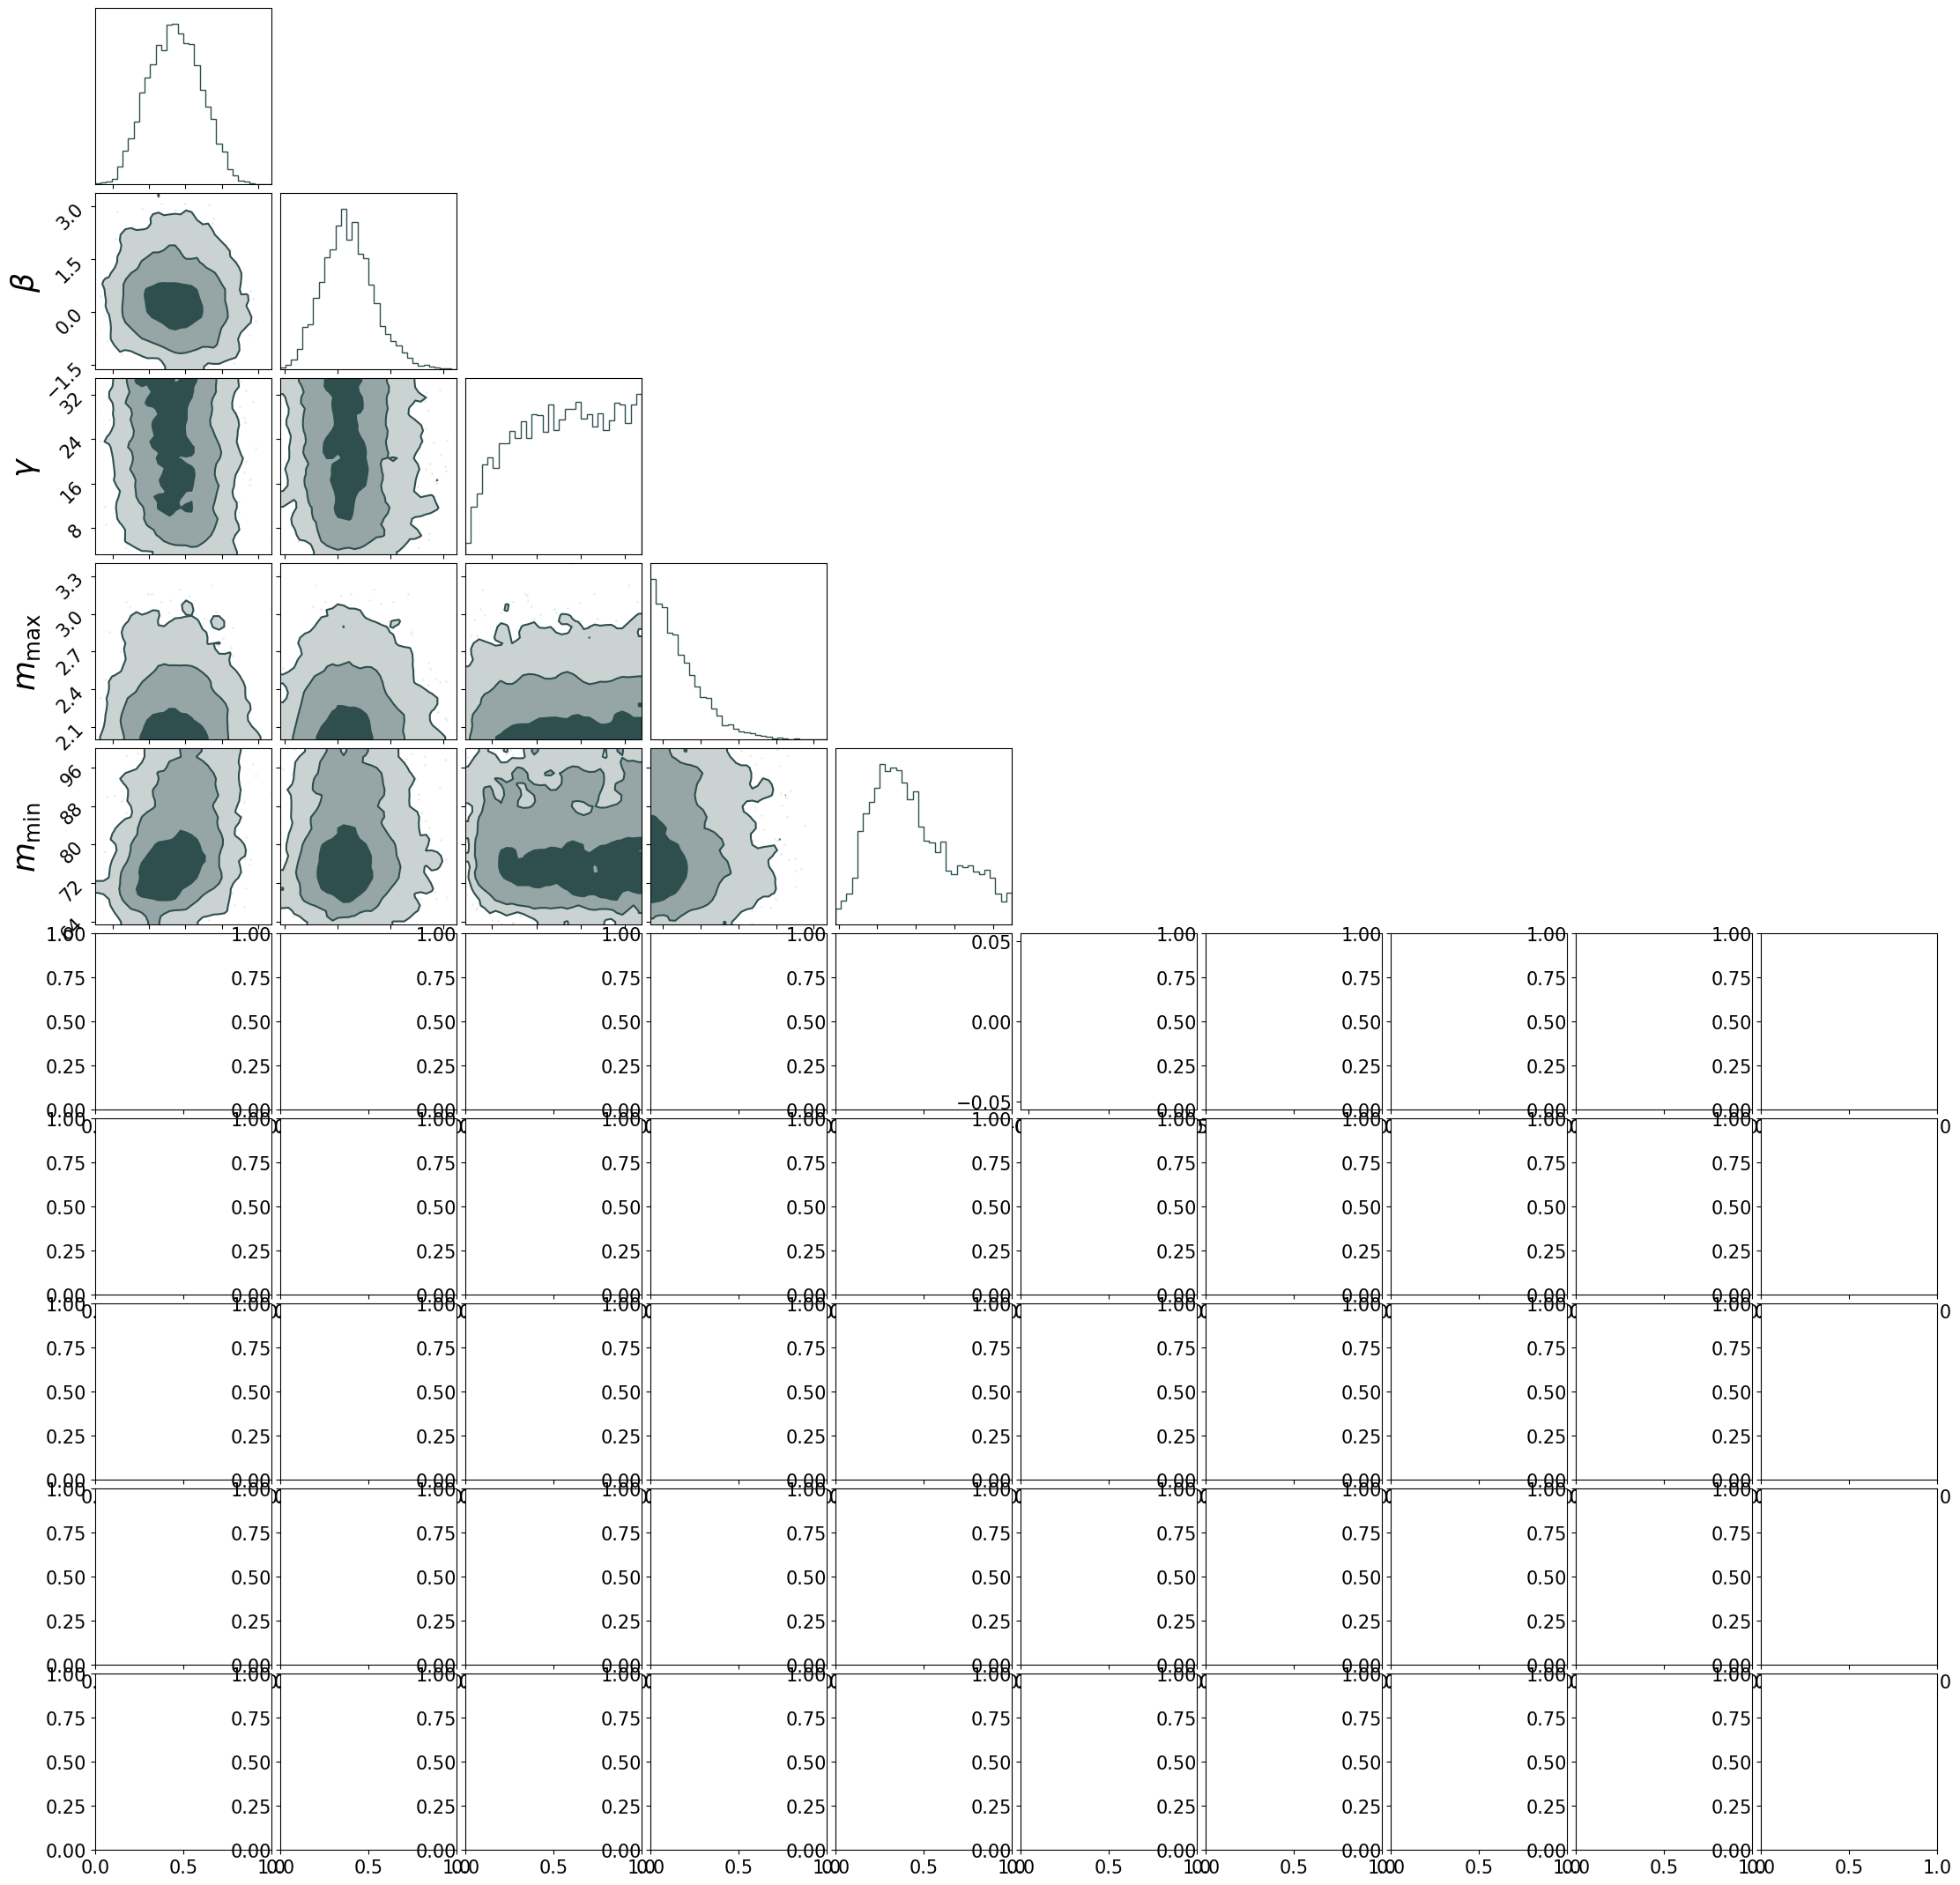

In [6]:
plt.rcParams.update({'font.size': 15})
colors=['darkslategrey', 'mediumseagreen']
labels=['With GW190814', 'Without GW190814']
fig = corner.corner(PL_result_dict,  **corner_kwargs)
corner.corner(PL_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 5), loc="upper right"
    )
#plt.savefig('paper_plots/PL_corner.pdf')

In [ ]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkslateblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=18),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$', r'$\zeta$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="mediumorchid",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=21),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$', r'$\zeta$'],
)

IndexError: list index out of range

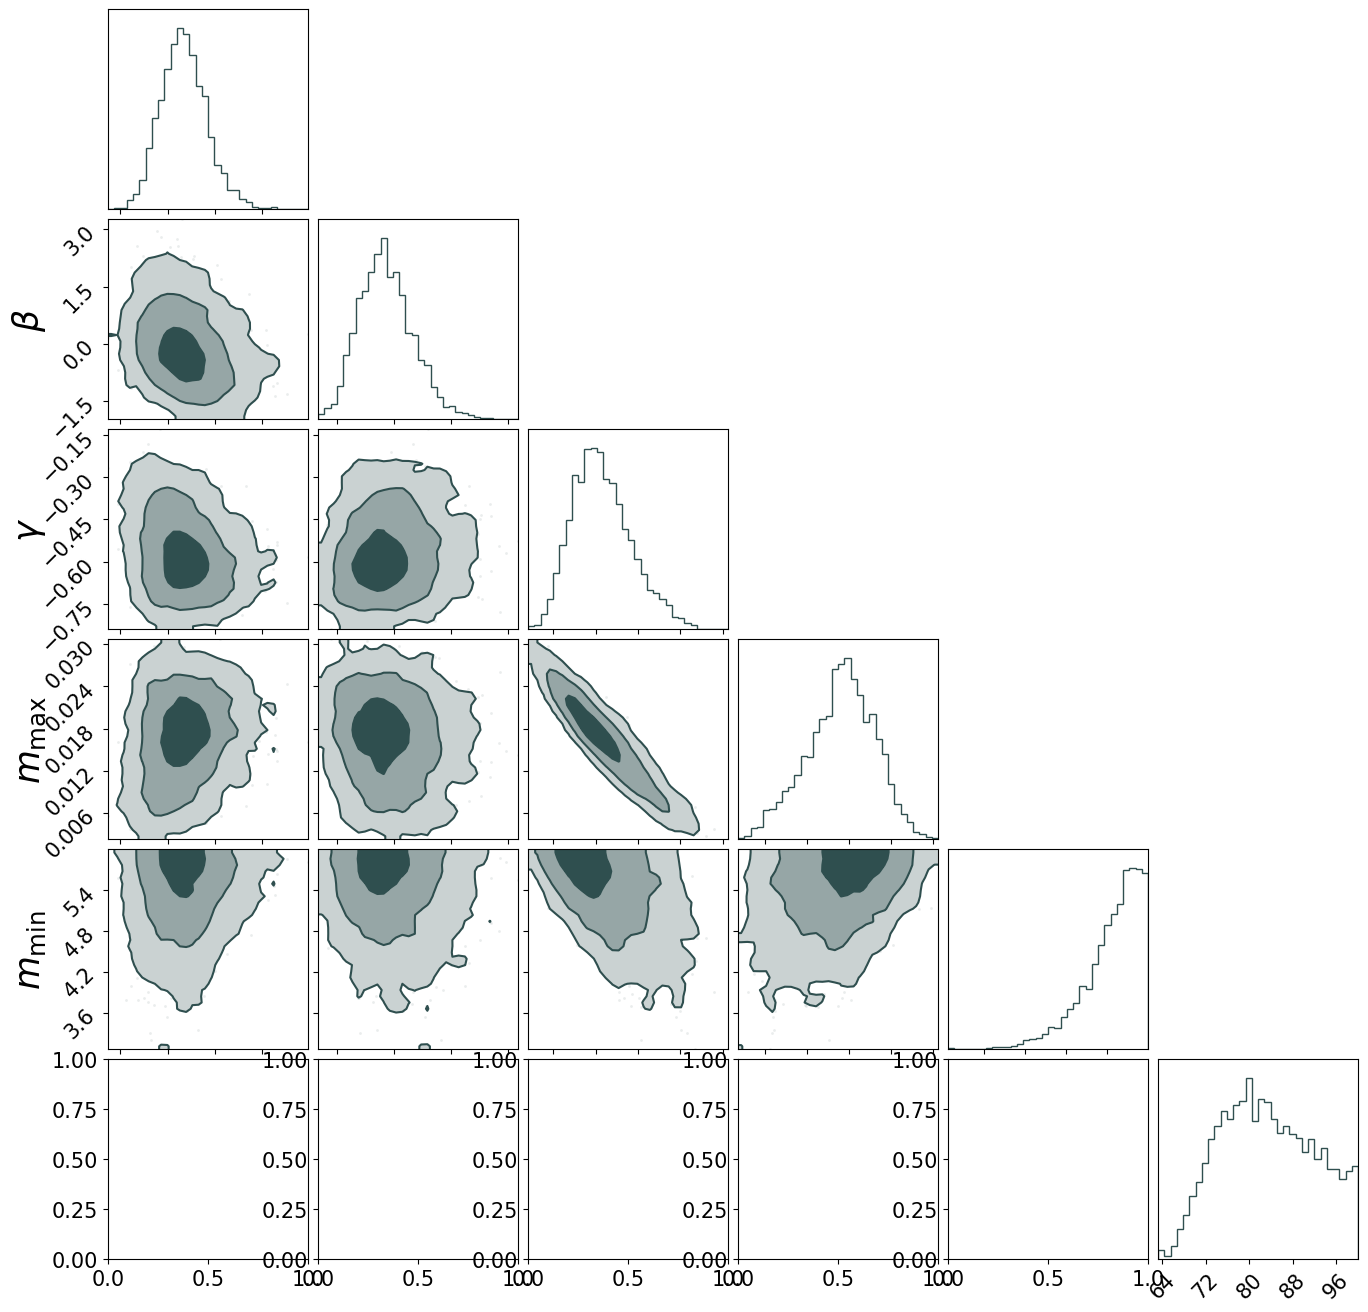

In [7]:
parabola_result_dict = {'alpha':result_parabola['posterior']['alpha'], 
                         'beta':result_parabola['posterior']['beta'], 
                         'gamma':result_parabola['posterior']['gamma'],
                         'zeta':result_parabola['posterior']['zeta'],
                         'mmin': result_parabola['posterior']['mmin'], 
                         'mmax': result_parabola['posterior']['mmax']}
parabola_no190814_result_dict = {'alpha':result_parabola_no190814['posterior']['alpha'], 
                         'beta':result_parabola_no190814['posterior']['beta'], 
                         'gamma':result_parabola_no190814['posterior']['gamma'],
                         'zeta':result_parabola_no190814['posterior']['zeta'],
                         'mmin': result_parabola_no190814['posterior']['mmin'], 
                         'mmax': result_parabola_no190814['posterior']['mmax']}

plt.rcParams.update({'font.size': 15})
colors=['darkslateblue', 'mediumorchid']
labels=['With GW190814', 'Without GW190814']
fig = corner.corner(parabola_result_dict, **corner_kwargs)
corner.corner(parabola_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 6), loc="upper right"
    )
#plt.savefig('paper_plots/parabola_corner.pdf', rasterize=True)

In [5]:
def PL_m2min_m1(mass1, mmax, mmin, gamma):
    m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin
    m2min[m2min>mmax]=np.nan
    return m2min
    
def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    m2min[m2min>mmax]=np.nan
    return m2min


Text(0, 0.5, '$m_2^{\\rm min}$')

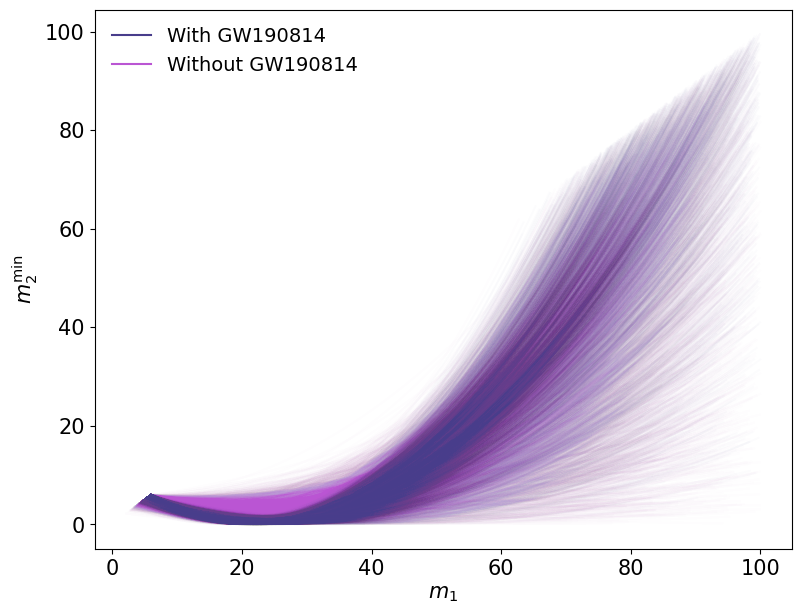

In [9]:
colors=['darkslateblue', 'mediumorchid']
labels=['With GW190814', 'Without GW190814']
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (9,7)

for i in range(3500):
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    mass1_parabola_no190814 = np.linspace(parabola_no190814_result_dict['mmin'][i], parabola_no190814_result_dict['mmax'][i],1000)
    m2min_parabola_no190814 = parabola_m2min_m1(mass1_parabola_no190814, parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i])
    plt.plot(mass1_parabola, m2min_parabola, color=colors[0], alpha=0.01, rasterized=True)
    plt.plot(mass1_parabola_no190814, m2min_parabola_no190814, color=colors[1], alpha=0.01, rasterized=True)

plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=14, frameon=False,
        bbox_to_anchor=(0, 1), loc="upper left"
    )
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')
#plt.savefig('paper_plots/parabola_modellines.pdf')

Text(0, 0.5, '$m_2^{\\rm min} /M_{\\odot}$')

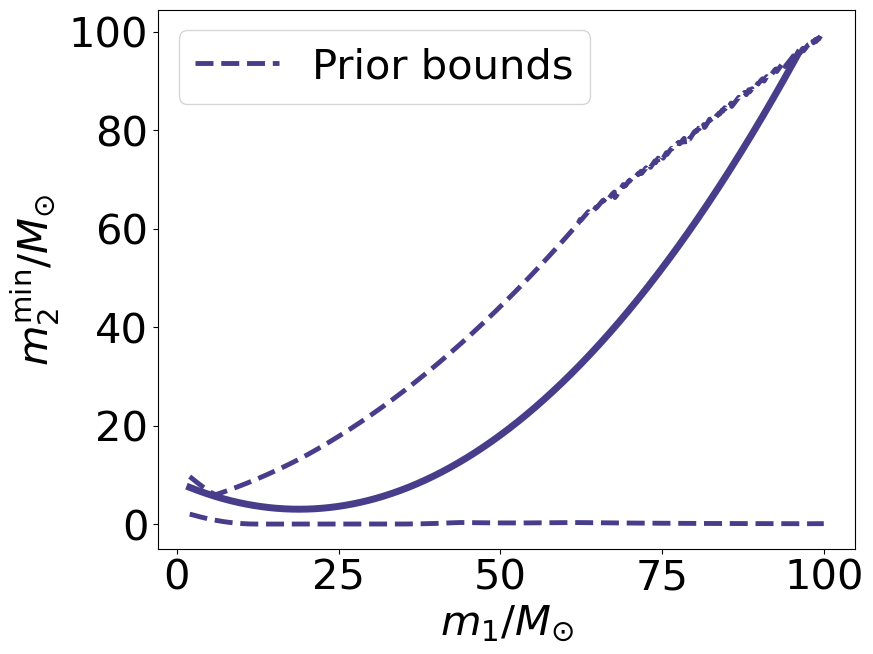

In [57]:
colors=['darkslateblue', 'mediumorchid', 'black']
plt.rcParams.update({'font.size': 30})

plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=0, axis=0), lw=3.5, ls='--', label='Prior bounds', color=colors[0])
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=100, axis=0), lw=3.5, ls='--', color=colors[0])
plt.plot(mass1_arry,m2min_parabola[2], lw=5, color=colors[0])
plt.legend()
plt.xlabel(r'$m_1 /M_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} /M_{\odot}$')


Text(0, 0.5, '$m_2^{\\rm min} /M_{\\odot}$')

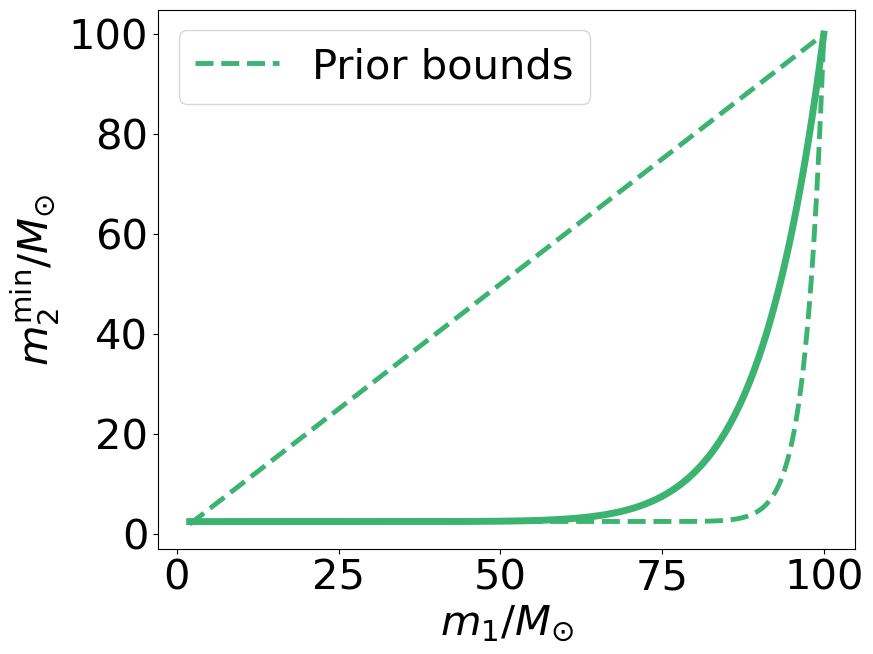

In [63]:
colors=['mediumseagreen', 'mediumorchid', 'black']
plt.rcParams.update({'font.size': 30})

plt.plot(mass1_arry,PL_m2min_m1(mass1_arry, 100., 2.5, 1.), lw=3.5, ls='--', label='Prior bounds', color=colors[0])
plt.plot(mass1_arry,PL_m2min_m1(mass1_arry, 100., 2.5, 35.), lw=3.5, ls='--', color=colors[0])
plt.plot(mass1_arry,PL_m2min_m1(mass1_arry, 100., 2.5, 10.), lw=5, color=colors[0])
plt.legend()
plt.xlabel(r'$m_1 /M_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} /M_{\odot}$')

In [13]:
PDF=[]
for i in range(len(mass1_parabola)):
    PDF.append(np.trapz(m2min_parabola[:i+1], mass1_parabola[:i+1])/np.trapz(m2min_parabola))

Text(0, 0.5, '$m_2^{\\rm min}$')

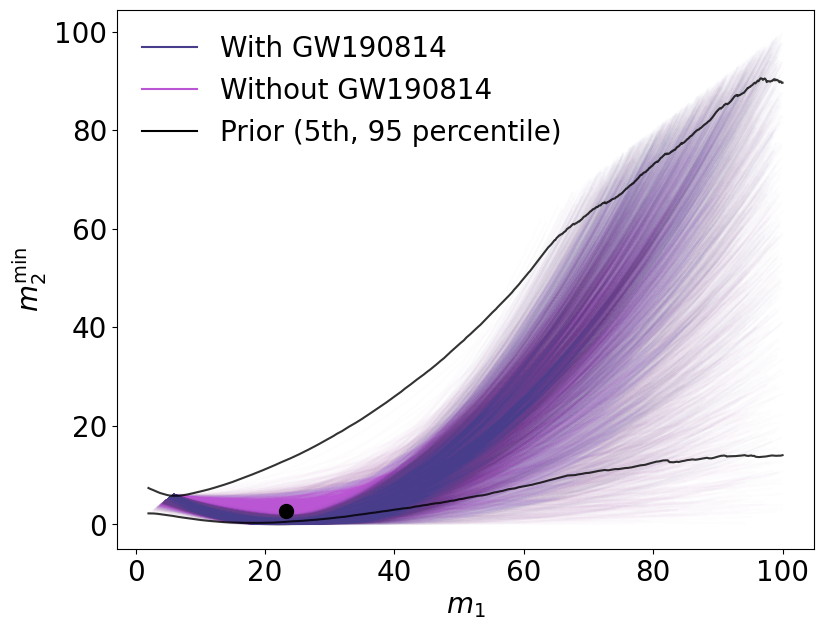

In [39]:
colors=['darkslateblue', 'mediumorchid', 'black']
labels=['With GW190814', 'Without GW190814', 'Prior (5th, 95 percentile)']
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (9,7)

for i in range(3529):
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    mass1_parabola_no190814 = np.linspace(parabola_no190814_result_dict['mmin'][i], parabola_no190814_result_dict['mmax'][i],1000)
    m2min_parabola_no190814 = parabola_m2min_m1(mass1_parabola_no190814, parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i])
    plt.plot(mass1_parabola, m2min_parabola, color=colors[0], alpha=0.01, rasterized=True)
    plt.plot(mass1_parabola_no190814, m2min_parabola_no190814, color=colors[1], alpha=0.01, rasterized=True)

#plot GW190814
for filename in glob.glob("inference/m1_q_event_samples/*190814*.h5"):
    print
    mass1= h5py.File(filename)['mass_1']
    mass2=np.array(h5py.File(filename)['mass_ratio'])*np.array(h5py.File(filename)['mass_1'])
    eventname = (os.path.basename(filename)).split('.')[0]
    plt.scatter(np.median(mass1),np.median(mass2), color='black', s=100, zorder=1000)

mmax = Uniform(minimum=62, maximum=100, name='mmax', latex_label='$m_{\\max}$')
mmin = Uniform(minimum=2, maximum=6, name='mmin', latex_label='$m_{\\min}$')
prior = variable_qmin.zeta_with_conditional(mmax,mmin)
prior_samps = prior.sample(3000)

mass1_arry = np.linspace(2., 100.,1000)
m2min_parabola = [parabola_m2min_m1(mass1_arry, prior_samps['mmax'][i], prior_samps['mmin'][i],\
                     prior_samps['gamma'][i], prior_samps['zeta'][i]) for i in range(3000)]
#plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=0, axis=0), label='prior', color='black', alpha=0.1)
#plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=100, axis=0), color='black', alpha=0.1)
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=5, axis=0), label='prior', color=colors[2], alpha=0.8)
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=95, axis=0), color=colors[2], alpha=0.8)
#plt.plot(mass1_arry,np.nanmedian(m2min_parabola, axis=0), color='black', alpha=0.8)

plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(3)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(0, 1), loc="upper left"
    )
plt.xlabel(r'$m_1 /M_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} /M_{\odot}$')
#plt.savefig('paper_plots/parabola_modellines.pdf')

Text(0, 0.5, '$m_2^{\\rm min} /M_{\\odot}$')

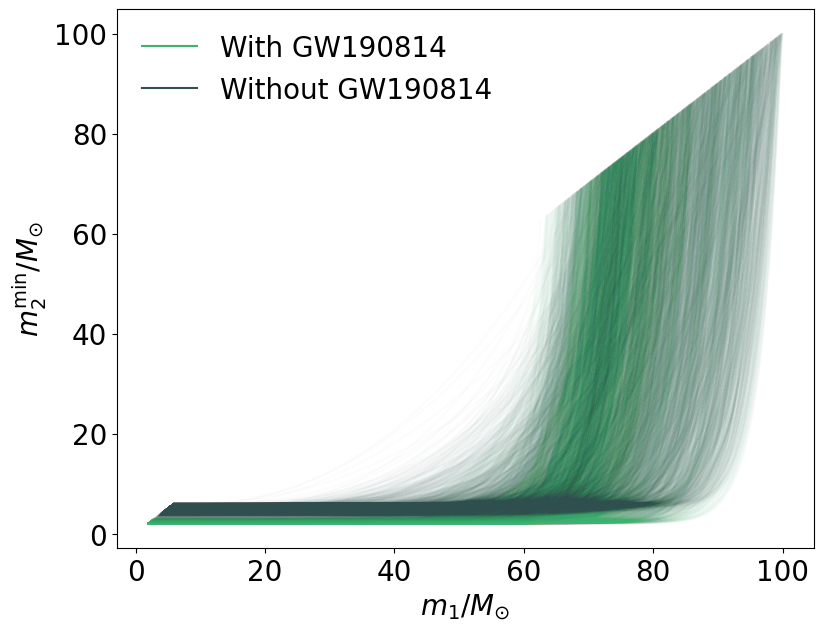

In [40]:
colors=['mediumseagreen', 'darkslategrey']
for i in range(3500):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    mass1_PL_no190814 = np.linspace(PL_no190814_result_dict['mmin'][i], PL_no190814_result_dict['mmax'][i],1000)
    m2min_PL_no190814 = PL_m2min_m1(mass1_PL_no190814, PL_no190814_result_dict['mmax'][i], PL_no190814_result_dict['mmin'][i],\
                     PL_no190814_result_dict['gamma'][i])
    plt.plot(mass1_PL, m2min_PL, color='mediumseagreen', alpha=0.01)
    plt.plot(mass1_PL_no190814, m2min_PL_no190814, color='darkslategrey', alpha=0.01)

plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(0, 1), loc="upper left"
    )
plt.xlabel(r'$m_1 /M_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} /M_{\odot}$')
#plt.savefig('paper_plots/PL_modellines.pdf')

In [5]:
mass1_arry = np.linspace(2., 100.,1000)
m2min_parabola = [parabola_m2min_m1(mass1_arry, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814 = [parabola_m2min_m1(mass1_arry, parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]

Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

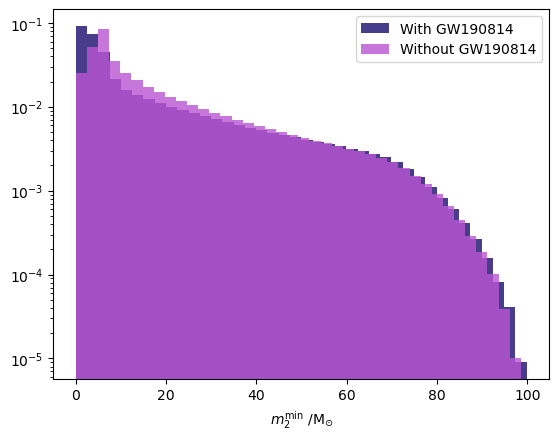

In [33]:
plt.hist(np.array(m2min_parabola).flatten(), bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814).flatten(), bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [41]:
m2min_parabola_m1_10 = [parabola_m2min_m1([10.], parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814_m1_10 = [parabola_m2min_m1([10.], parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]
m2min_parabola_m1_20 = [parabola_m2min_m1([20.], parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814_m1_20 = [parabola_m2min_m1([20.], parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]

Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$ at $m_1=10M_{\\odot}$')

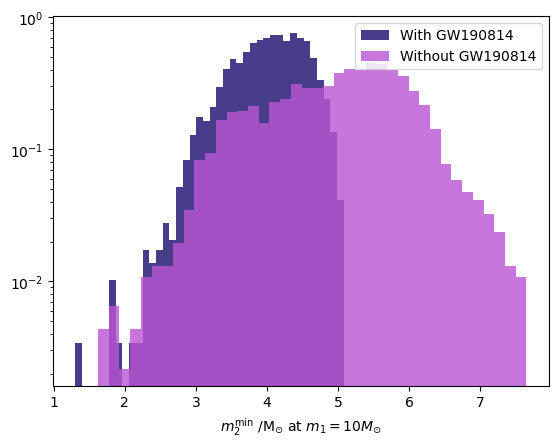

In [84]:
plt.hist(np.array(m2min_parabola_m1_10).flatten(), bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814_m1_10).flatten(), bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$ at $m_1=10M_{\odot}$')

Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$ at $m_1=20M_{\\odot}$')

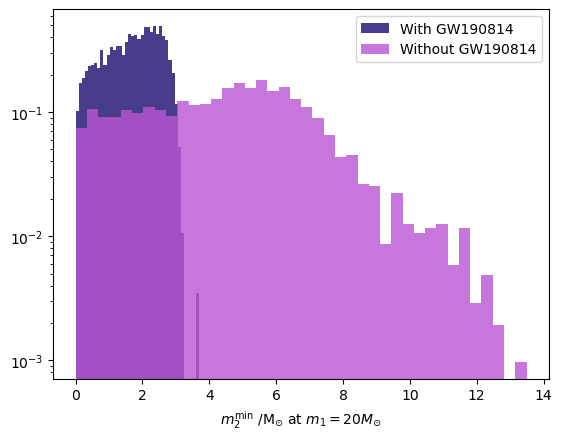

In [85]:
plt.hist(np.array(m2min_parabola_m1_20).flatten(), bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814_m1_20).flatten(), bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$ at $m_1=20M_{\odot}$')

In [60]:
m1_slices = [10.,20.,40.,80.]
no_points = 1000

p_m1 = np.zeros((3529,4))
p_m1_no190814 = np.zeros((3529,4))
variable_qmin_class = SmoothedParabolam2min(backend='numpy')

for m1_idx, m1 in enumerate(m1_slices):
    dataset={'mass_1':np.array([m1]), 'mass_ratio':np.linspace(0.,1.,no_points)} 
    params=dict(alpha=parabola_result_dict['alpha'][i],
                mmin=parabola_result_dict['mmin'][i],
                mmax=parabola_result_dict['mmax'][i],
                lam=parabola_result_dict['lam'][i],
                mpp=parabola_result_dict['mpp'][i],
                sigpp=parabola_result_dict['sigpp'][i],
                delta_m=parabola_result_dict['delta_m'][i],
                gaussian_mass_maximum=parabola_result_dict['gaussian_mass_maximum'][i])
    params_no190814=dict(alpha=parabola_no190814_result_dict['alpha'][i],
                         mmin=parabola_no190814_result_dict['mmin'][i],
                         mmax=parabola_no190814_result_dict['mmax'][i],
                         lam=parabola_no190814_result_dict['lam'][i],
                         mpp=parabola_no190814_result_dict['mpp'][i],
                         sigpp=parabola_no190814_result_dict['sigpp'][i],
                        delta_m=parabola_no190814_result_dict['delta_m'][i],
                        gaussian_mass_maximum=parabola_no190814_result_dict['gaussian_mass_maximum'][i])
    p_m1[:, m1_idx] = np.array([variable_qmin_class.p_m1(dataset, **params) for i in range(3529)])[:,0]
    p_m1_no190814[:, m1_idx] = np.array([variable_qmin_class.p_m1(dataset, **params_no190814) for i in range(3529)])[:,0]

TypeError: BaseSmoothedMassDistribution.__init__() got an unexpected keyword argument 'backend'

In [8]:
Nq=100
from tqdm import tqdm
m1_slices = [10.,20.,40.,80.]

p_q = np.zeros((len(parabola_result_dict['alpha']), Nq, 4))
p_q_no190814 = np.zeros((len(parabola_no190814_result_dict['alpha']), Nq, 4))

for m1_idx, m1 in enumerate(m1_slices):
    
    dataset={'mass_1':np.array([m1]), 'mass_ratio':np.linspace(0.,1.,Nq)} 
    m2min_parabola = [parabola_m2min_m1(np.array([m1]), parabola_result_dict['mmax'][j], parabola_result_dict['mmin'][j],\
                 parabola_result_dict['gamma'][j], parabola_result_dict['zeta'][j]) for j in range(len(parabola_result_dict['mmax']))]
    m2min_parabola_no190814 = [parabola_m2min_m1(np.array([m1]), parabola_no190814_result_dict['mmax'][j], parabola_no190814_result_dict['mmin'][j],\
                 parabola_no190814_result_dict['gamma'][j], parabola_no190814_result_dict['zeta'][j]) for j in range(len(parabola_no190814_result_dict['mmax']))]
    
    for i in tqdm(range(3529)):
        p_q[i,:,m1_idx] = powerlaw(dataset["mass_ratio"], parabola_result_dict['beta'][i], 1, np.array(m2min_parabola)[i] / dataset["mass_1"]) *variable_qmin.smoothing(dataset["mass_1"] * dataset["mass_ratio"],
            mmin=np.array(m2min_parabola)[i],
            mmax=dataset["mass_1"],
            delta_m=parabola_result_dict['delta_m'][i],)
    
    for i in tqdm(range(3529)):
        p_q_no190814[i,:,m1_idx] = powerlaw(dataset["mass_ratio"], parabola_no190814_result_dict['beta'][i], 1, np.array(m2min_parabola_no190814)[i] / dataset["mass_1"]) *variable_qmin.smoothing(dataset["mass_1"] * dataset["mass_ratio"],
            mmin=np.array(m2min_parabola_no190814)[i],
            mmax=dataset["mass_1"],
            delta_m=parabola_no190814_result_dict['delta_m'][i],)

  0%|          | 0/3529 [00:00<?, ?it/s]/opt/conda3/lib/python3.10/site-packages/gwpopulation/utils.py:127: RuntimeWarning: divide by zero encountered in power
  prob = xp.power(xx, alpha)
/opt/conda3/lib/python3.10/site-packages/gwpopulation/utils.py:129: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)
100%|██████████| 3529/3529 [00:07<00:00, 459.74it/s]


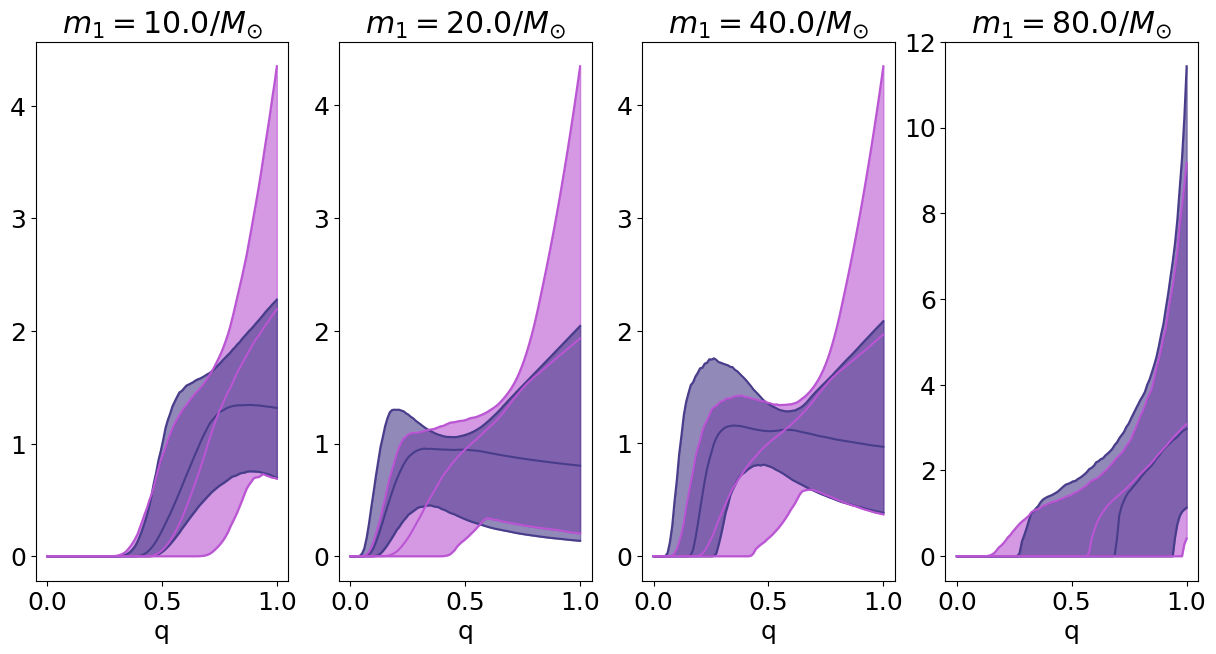

In [30]:
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams.update({'font.size': 18})
units = '/M_{\odot}'

fig,ax = plt.subplots(1,4)
for i in range(4):
    ax[i].plot(np.linspace(0,1,Nq), np.nanmedian(p_q, axis=0)[:,i], color='darkslateblue',\
             label=rf'With GW190814')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q, q=95, axis=0)[:,i], color='darkslateblue')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q, q=5, axis=0)[:,i], color='darkslateblue')
    ax[i].plot(np.linspace(0,1,Nq), np.nanmedian(p_q_no190814, axis=0)[:,i], color='mediumorchid',\
             label=rf'Without GW190814')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q_no190814, q=95, axis=0)[:,i], color='mediumorchid')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q_no190814, q=5, axis=0)[:,i], color='mediumorchid')
    ax[i].set_xlabel('q')
    ax[i].fill_between(np.linspace(0,1,Nq), np.nanpercentile(p_q_no190814, q=5, axis=0)[:,i]\
                 ,np.nanpercentile(p_q_no190814, q=95, axis=0)[:,i], color='mediumorchid', alpha=0.6)
    ax[i].fill_between(np.linspace(0,1,Nq), np.nanpercentile(p_q, q=5, axis=0)[:,i]\
                 ,np.nanpercentile(p_q, q=95, axis=0)[:,i], color='darkslateblue', alpha=0.6)
    #ax[0].legend()
    ax[i].set_title(rf'$m_1={str(m1_slices[i]) + units}$')
#plt.yscale('log')
#plt.xlabel(r'$m_2 ~/ \mathrm{M}_{\odot}$ at $m_1=10M_{\odot}$')

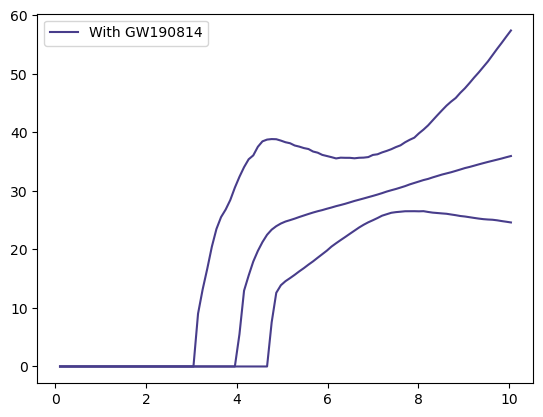

In [50]:
p_m2 = p_q/p_m1[:, np.newaxis]    
plt.plot(np.linspace(0,1,Nq)*mass1_arry[82], np.median(p_m2, axis=0), color='darkslateblue',\
         label='With GW190814')
plt.plot(np.linspace(0,1,Nq)*mass1_arry[82], np.percentile(p_m2, q=95, axis=0), color='darkslateblue')
plt.plot(np.linspace(0,1,Nq)*mass1_arry[82], np.percentile(p_m2, q=5, axis=0), color='darkslateblue')
plt.legend()

Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

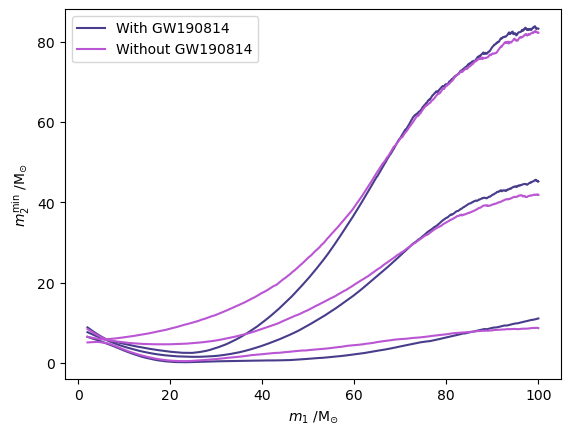

In [16]:
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=5, axis=0), color='darkslateblue')
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=95, axis=0), color='darkslateblue')
plt.plot(mass1_arry,np.nanmedian(m2min_parabola, axis=0), color='darkslateblue', label='With GW190814')

plt.plot(mass1_arry,np.nanpercentile(m2min_parabola_no190814, q=5, axis=0), color='mediumorchid')
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola_no190814, q=95, axis=0), color='mediumorchid')
plt.plot(mass1_arry,np.nanmedian(m2min_parabola_no190814, axis=0), color='mediumorchid', label='Without GW190814')

plt.legend()
plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [74]:
mass1_arry = np.linspace(2., 100.,1000)
m2min_PL = [PL_m2min_m1(mass1_array, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i]) for i in range(len(PL_result_dict['mmax']))]
m2min_PL_no190814 = [PL_m2min_m1(mass1_array, PL_no190814_result_dict['mmax'][i], PL_no190814_result_dict['mmin'][i],\
                     PL_no190814_result_dict['gamma'][i]) for i in range(len(PL_no190814_result_dict['mmax']))]

/tmp/ipykernel_2862982/133766630.py:2: RuntimeWarning: invalid value encountered in power
  m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin


Text(0.5, 0, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

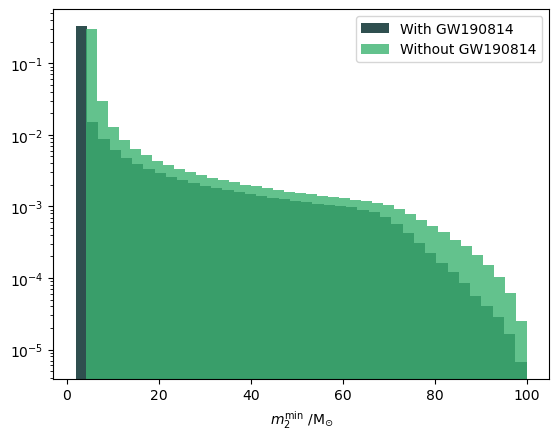

In [34]:
plt.hist(np.array(m2min_PL).flatten(), bins=40, color='darkslategrey',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_PL_no190814).flatten(), bins=40, color='mediumseagreen',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

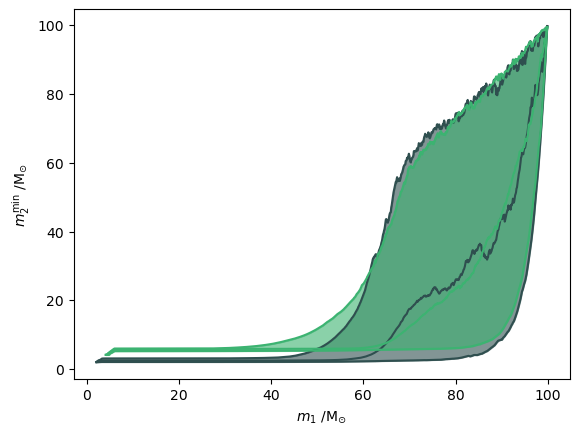

In [78]:
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=5,axis=0), color='darkslategrey')
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=95,axis=0), color='darkslategrey')
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=50,axis=0), color='darkslategrey')
plt.fill_between(mass1_array, np.nanpercentile(m2min_PL, q=5, axis=0)\
                 ,np.nanpercentile(m2min_PL, q=95, axis=0), color='darkslategrey', alpha=0.6)

plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=5,axis=0), color='mediumseagreen')
plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=95,axis=0), color='mediumseagreen')
plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=50,axis=0), color='mediumseagreen')
plt.fill_between(mass1_array, np.nanpercentile(m2min_PL_no190814, q=5, axis=0)\
                 ,np.nanpercentile(m2min_PL_no190814, q=95, axis=0), color='mediumseagreen', alpha=0.6)

plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [100]:
m1_slices = [10.,20.,40.,80.]
no_points = 1000

p_m1 = np.zeros((3529,4))
p_m1_no190814 = np.zeros((3529,4))
variable_qmin_class = SmoothedPowerlawm2min()

for m1_idx, m1 in enumerate(m1_slices):
    dataset={'mass_1':np.array([m1]), 'mass_ratio':np.linspace(0.,1.,no_points)} 
    params=dict(alpha=PL_result_dict['alpha'][i],
                mmin=PL_result_dict['mmin'][i],
                mmax=PL_result_dict['mmax'][i],
                lam=PL_result_dict['lam'][i],
                mpp=PL_result_dict['mpp'][i],
                sigpp=PL_result_dict['sigpp'][i],
                delta_m=PL_result_dict['delta_m'][i],
                gaussian_mass_maximum=PL_result_dict['gaussian_mass_maximum'][i])
    params_no190814=dict(alpha=PL_no190814_result_dict['alpha'][i],
                         mmin=PL_no190814_result_dict['mmin'][i],
                         mmax=PL_no190814_result_dict['mmax'][i],
                         lam=PL_no190814_result_dict['lam'][i],
                         mpp=PL_no190814_result_dict['mpp'][i],
                         sigpp=PL_no190814_result_dict['sigpp'][i],
                        delta_m=PL_no190814_result_dict['delta_m'][i],
                        gaussian_mass_maximum=parabola_no190814_result_dict['gaussian_mass_maximum'][i])
    p_m1[:, m1_idx] = np.array([variable_qmin_class.p_m1(dataset, **params) for i in range(3529)])[:,0]
    p_m1_no190814[:, m1_idx] = np.array([variable_qmin_class.p_m1(dataset, **params_no190814) for i in range(3529)])[:,0]

In [31]:
Nq=100
from tqdm import tqdm
p_q = np.zeros((len(parabola_result_dict['alpha']), Nq, 4))
p_q_no190814 = np.zeros((len(parabola_no190814_result_dict['alpha']), Nq, 4))

for m1_idx, m1 in enumerate(m1_slices):
    
    dataset={'mass_1':np.array([m1]), 'mass_ratio':np.linspace(0.,1.,Nq)} 
    m2min_PL = [PL_m2min_m1(np.array([m1]), PL_result_dict['mmax'][j], PL_result_dict['mmin'][j],\
                 PL_result_dict['gamma'][j]) for j in range(len(PL_result_dict['mmax']))]
    m2min_PL_no190814 = [PL_m2min_m1(np.array([m1]), PL_no190814_result_dict['mmax'][j], PL_no190814_result_dict['mmin'][j],\
                 PL_no190814_result_dict['gamma'][j]) for j in range(len(PL_no190814_result_dict['mmax']))]
    
    for i in tqdm(range(3500)):
        p_q[i,:,m1_idx] = powerlaw(dataset["mass_ratio"], PL_result_dict['beta'][i], 1, np.array(m2min_PL)[i] / dataset["mass_1"]) *variable_qmin.smoothing(dataset["mass_1"] * dataset["mass_ratio"],
            mmin=np.array(m2min_PL)[i],
            mmax=dataset["mass_1"],
            delta_m=PL_result_dict['delta_m'][i],)
    
    for i in tqdm(range(3500)):
        p_q_no190814[i,:,m1_idx] = powerlaw(dataset["mass_ratio"], PL_no190814_result_dict['beta'][i], 1, np.array(m2min_PL_no190814)[i] / dataset["mass_1"]) *variable_qmin.smoothing(dataset["mass_1"] * dataset["mass_ratio"],
            mmin=np.array(m2min_PL_no190814)[i],
            mmax=dataset["mass_1"],
            delta_m=PL_no190814_result_dict['delta_m'][i],)

100%|██████████| 3500/3500 [00:07<00:00, 480.00it/s]


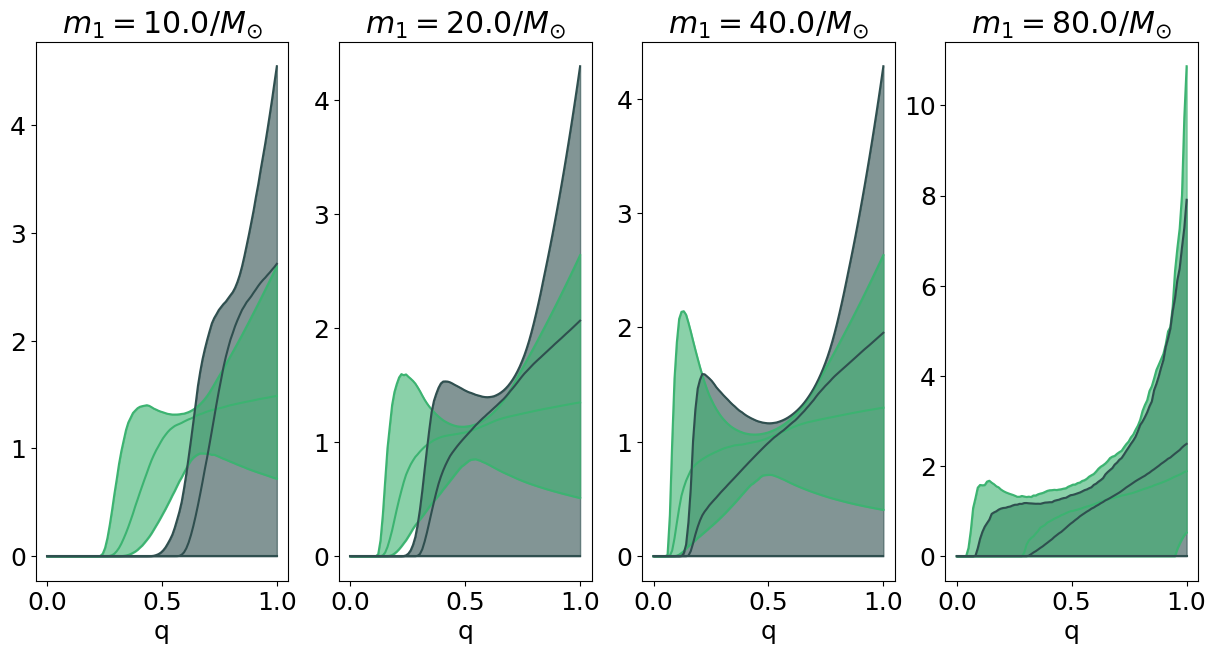

In [33]:
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams.update({'font.size': 18})

fig,ax = plt.subplots(1,4)
for i in range(4):
    ax[i].plot(np.linspace(0,1,Nq), np.nanmedian(p_q, axis=0)[:,i], color='mediumseagreen',\
             label=rf'With GW190814')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q, q=95, axis=0)[:,i], color='mediumseagreen')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q, q=5, axis=0)[:,i], color='mediumseagreen')
    ax[i].plot(np.linspace(0,1,Nq), np.nanmedian(p_q_no190814, axis=0)[:,i], color='darkslategrey',\
             label=rf'Without GW190814')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q_no190814, q=95, axis=0)[:,i], color='darkslategrey')
    ax[i].plot(np.linspace(0,1,Nq), np.nanpercentile(p_q_no190814, q=5, axis=0)[:,i], color='darkslategrey')
    ax[i].set_xlabel('q')
    ax[i].fill_between(np.linspace(0,1,Nq), np.nanpercentile(p_q_no190814, q=5, axis=0)[:,i]\
                 ,np.nanpercentile(p_q_no190814, q=95, axis=0)[:,i], color='darkslategrey', alpha=0.6)
    ax[i].fill_between(np.linspace(0,1,Nq), np.nanpercentile(p_q, q=5, axis=0)[:,i]\
                 ,np.nanpercentile(p_q, q=95, axis=0)[:,i], color='mediumseagreen', alpha=0.6)
    #ax[0].legend()
    ax[i].set_title(rf'$m_1={str(m1_slices[i]) + units}$')
#plt.yscale('log')
#plt.xlabel(r'$m_2 ~/ \mathrm{M}_{\odot}$ at $m_1=10M_{\odot}$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$q_{\\rm min}$')

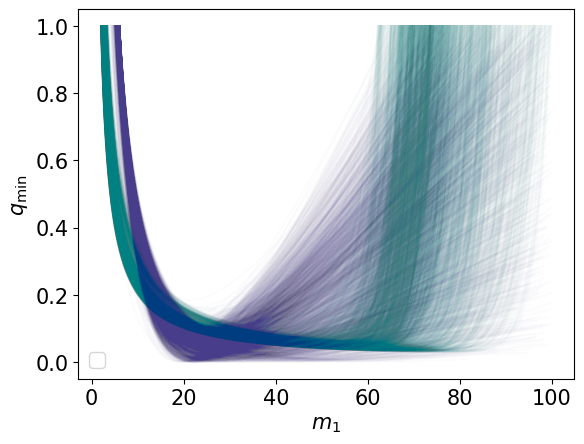

In [61]:
for i in range(2422):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
#plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.)/mass1_prior, color='darkslateblue',\
#         ls='dashed', linewidth=2., label='Parabola prior')
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
plt.legend()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$q_{\rm min}$')

Text(0.5, 0, '$q_{\\rm min}$ at $m_1=20M_{\\odot}$')

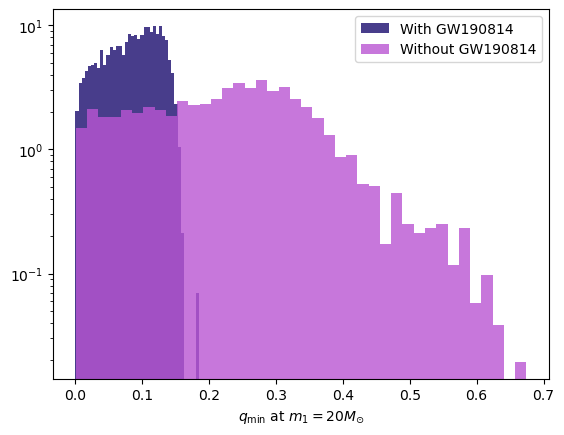

In [83]:
plt.hist(np.array(m2min_parabola_m1_20).flatten()/20., bins=40, color='darkslateblue',\
         label='With GW190814', density=True)
plt.hist(np.array(m2min_parabola_no190814_m1_20).flatten()/20., bins=40, color='mediumorchid',\
         label='Without GW190814', density=True, alpha=0.8)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$q_{\rm min}$ at $m_1=20M_{\odot}$')

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/corner/core.py:795: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


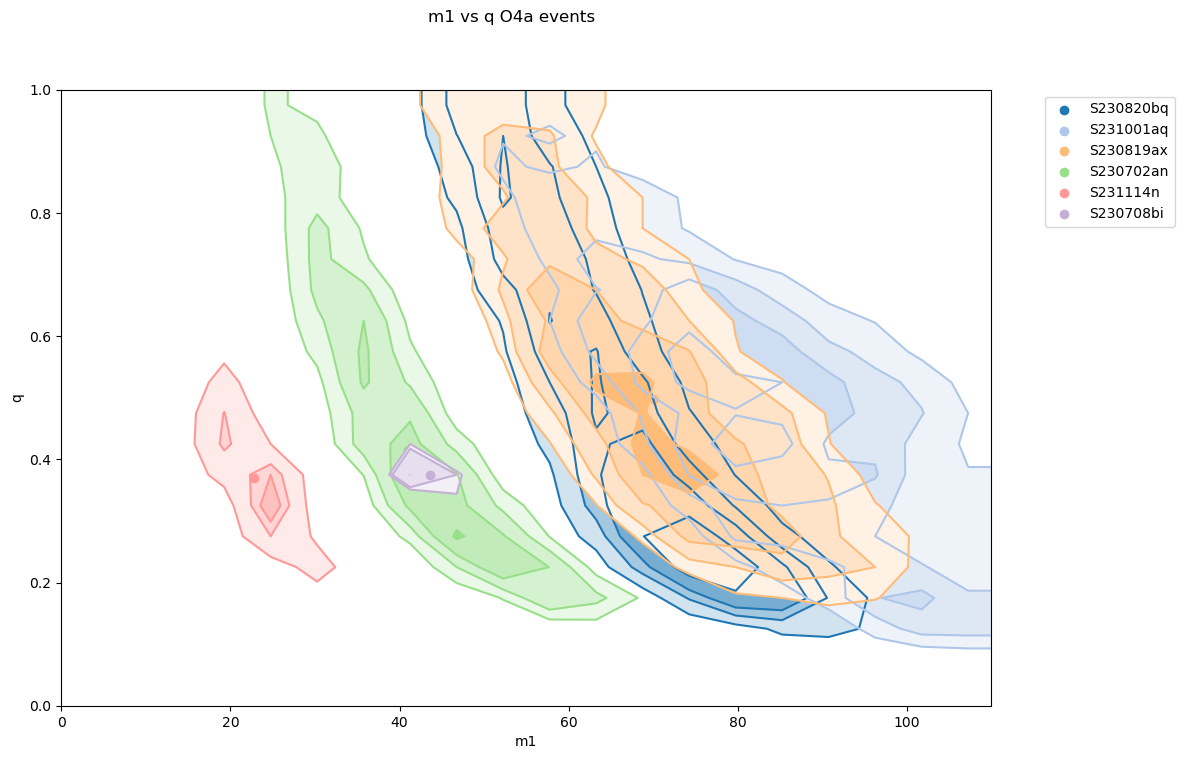

In [77]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)

#plot events
for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    eventname = (os.path.basename(filename)).split('.')[0]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i], contour_kwargs={'label':f'{eventname}'})
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

"""
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
"""

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q O4a events')
plt.savefig('m1_vs_q_O4a_events_nomodels.pdf', bbox_inches='tight')

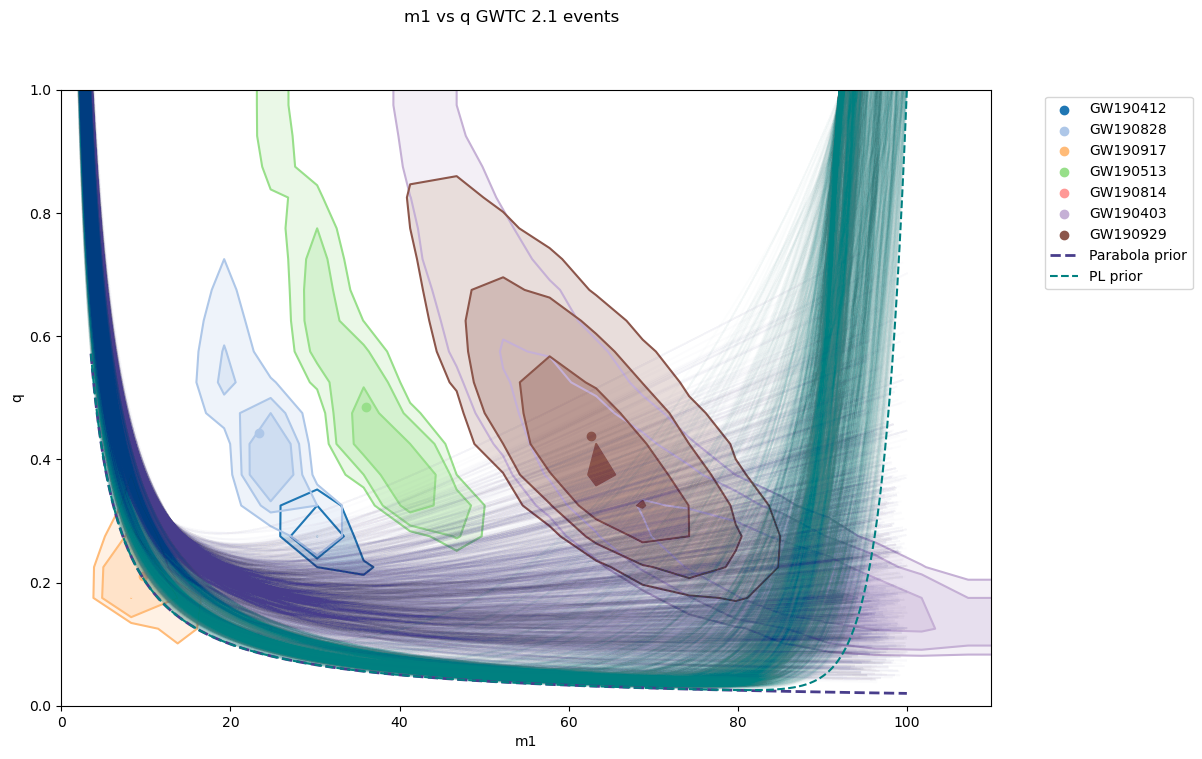

In [79]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1
        
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')


plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 2.1 events')
plt.savefig('m1_vs_q_GWTC21_events_models.pdf', bbox_inches='tight')

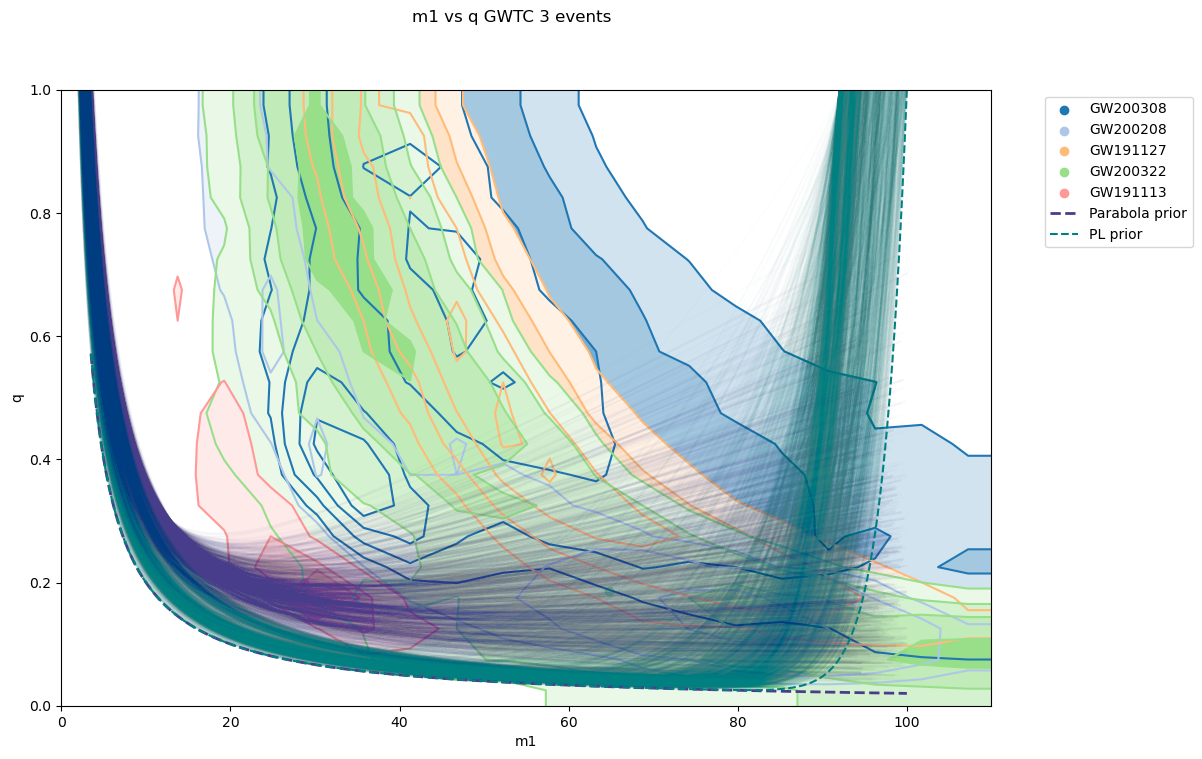

In [80]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)


for filename in glob.glob("m1_q_event_samples/IGWN-GWTC3*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 3 events')
plt.savefig('m1_vs_q_GWTC_3_events_models.pdf', bbox_inches='tight')